In [ ]:
%reset -f
import sys
sys.path.insert(0,'..')
from wavhandler import *
from utils_train import *
from utils import *
from configs import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
d = DatasetConfiguration(names=['Wingbeats'])
d.select(name='Wingbeats', species=['An. arabiensis'])

Dataset - Wingbeats - exists: True


In [3]:
%%time
d.read()
d.fnames.shape
d.clean()

CPU times: user 788 ms, sys: 293 ms, total: 1.08 s
Wall time: 2min 47s


In [6]:
%%time
d.read()
d.fnames.shape
d.clean()

CPU times: user 14.8 s, sys: 4.73 s, total: 19.5 s
Wall time: 1min 58s


In [4]:
%%time
w = get_clean_wingbeats_multiple_runs(names=d.fnames.head(1000).tolist())

CPU times: user 75.3 ms, sys: 71.1 ms, total: 146 ms
Wall time: 8.92 s


In [5]:
w

0       9.613422
1      12.292730
2      10.783085
3      13.104074
4       9.652894
         ...    
995    10.912866
996    10.837359
997    10.667204
998    12.320075
999    10.211348
Length: 1000, dtype: float64

In [19]:
z = make_df_parallel(setting='rawflt', names=d.fnames.head(135).tolist())
sig = z.iloc[rdm,:]


In [162]:
get_clean_wingbeats_normalization(names=d.fnames.sample(15).tolist())

array([38.82135991, 17.1267301 , 34.88991402, 20.63554542, 17.76450463,
       39.64197743, 32.00706223, 34.91360084, 26.71693636, 16.98345176,
       39.39599572, 35.62451535, 38.85902335, 32.3556621 , 27.73612809])

NameError: name 'topsd' is not defined

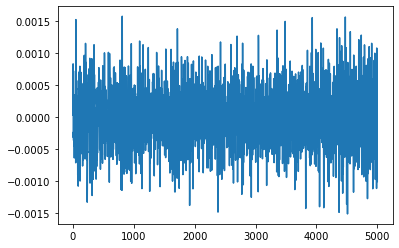

In [18]:
%%time
rdm = np.random.randint(0,z.shape[0])
sig = z.iloc[rdm,:]
sig.plot()
qq = sig.rolling(1000, axis=0,).apply(topsd)
plt.figure()
qq.plot()
print(qq[(qq<25)].shape[0] > 100)

In [168]:
print(qq[(qq<25)].shape[0])

25
